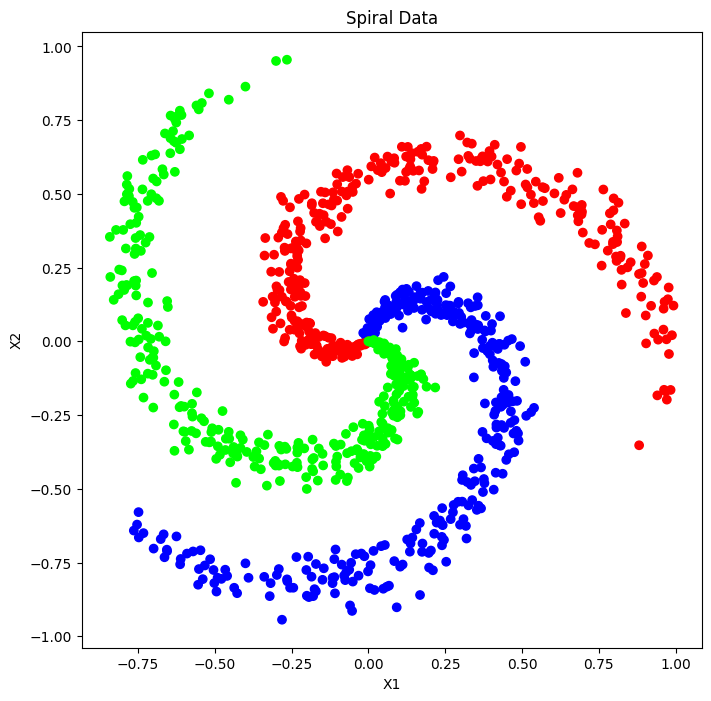

In [48]:
#LOADING THE PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore

# Function to generate spiral data
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        ix = range(n_points * class_number, n_points * (class_number + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([class_number] * n_points)
    return np.array(X), np.array(y)

# Generate spiral data
X, y = generate_spiral_data(333, 3)  # 999 points, 3 classes

# Plot the spiral data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()






In [78]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
# Compile the model
model.compile(optimizer= tf.keras.optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer= "adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [80]:
# Fit the model
history = model.fit(x=X_train_scaled, y=y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, verbose=1)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4160 - loss: 1.0387 - val_accuracy: 0.5600 - val_loss: 0.8621
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5686 - loss: 0.8382 - val_accuracy: 0.6000 - val_loss: 0.7069
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5985 - loss: 0.7141 - val_accuracy: 0.6150 - val_loss: 0.6156
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6234 - loss: 0.6202 - val_accuracy: 0.6550 - val_loss: 0.5528
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6513 - loss: 0.5865 - val_accuracy: 0.7300 - val_loss: 0.4917
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7351 - loss: 0.5111 - val_accuracy: 0.8650 - val_loss: 0.4399
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8292 - loss: 0.4599 - val_accuracy: 0.9200 - val_loss: 0.3832
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8807 - loss: 0.3980 - val_accuracy: 0.9350 - val_loss

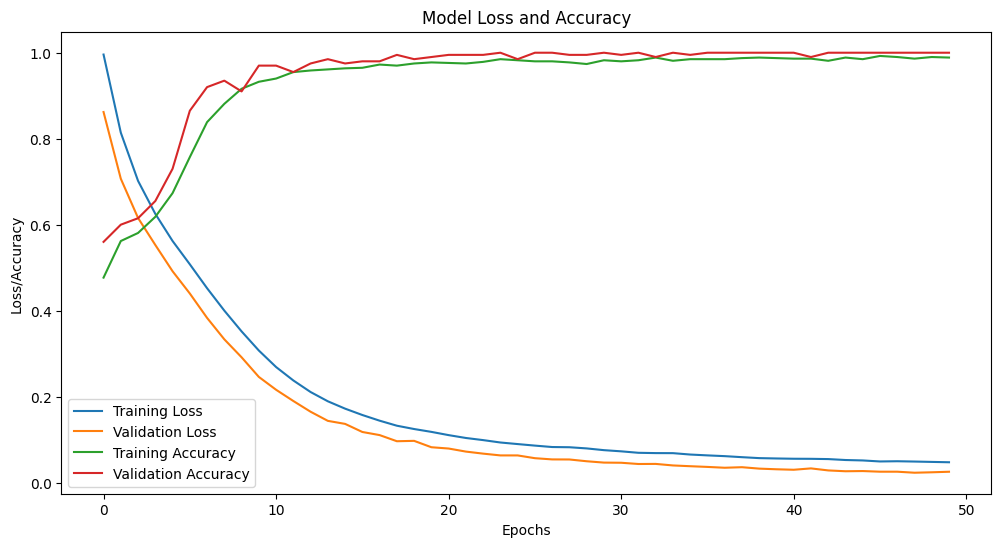

In [81]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


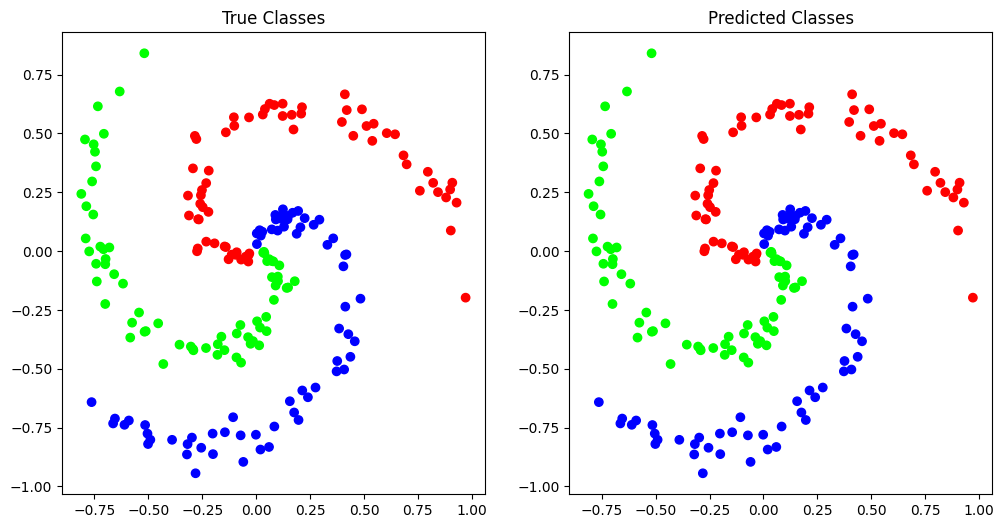

In [66]:
# Predict the class for test data
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Plot the comparison of predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='brg')
plt.title('True Classes')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='brg')
plt.title('Predicted Classes')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


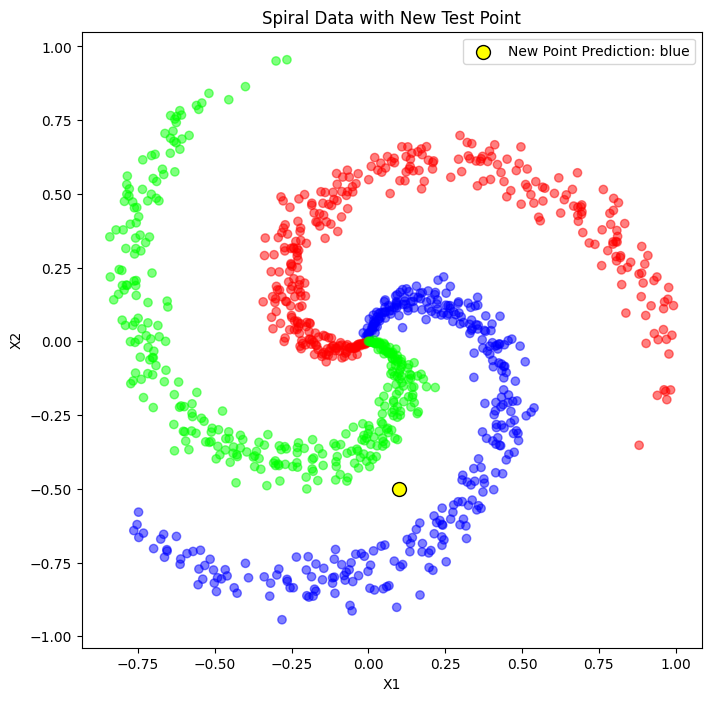

In [72]:
# New test point
new_point = np.array([[0.1, -0.5]])
new_point_scaled = scaler.transform(new_point)
new_pred = np.argmax(model.predict(new_point_scaled), axis=1)

# Color map for legend
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the new test point prediction
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', alpha=0.5)
plt.scatter(new_point[:, 0], new_point[:, 1], c='yellow', edgecolors='black', s=100, label=f'New Point Prediction: {color_map[new_pred[0]]}')
plt.title('Spiral Data with New Test Point')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()